# Project data exploration II -
## plotting categorical plot and incorporating other data

---


We will continue to work with the dataset that your group is consider for the term project. In this notebook we will create some plot using the Seaborn module and the different categorical plots we practiced in class. Additionally, we will explore the idea of working with other datasets in addition to the one you originally selected to strengthen your argument.

Group name:  Viz Visionaries  
Created by NAMES (SJSU IDs) : 016115515   
Last updated: 10/09/2025

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Path to the folder containing the real CSV
data_path = "term_Proj_accepted_2007_to_2018Q4.csv"

df = pd.read_csv(data_path)

print(df.shape)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'term_Proj_accepted_2007_to_2018Q4.csv'

### Q1: How clean is your data?  
Do you have formatting concerns, null values, inconsistent data, etc... If so, explain what cleaning or reformating you have to do and how you plan to approach this cleaning steps.

we had a lot of null values so we set a threshold to drop the columns with more than 95% null values. 

In [ ]:
# Drop columns with more than 95% missing
threshold = 0.95 * len(df)   # 95% of total rows
df = df.dropna(axis=1, thresh=threshold)

In [ ]:
missing_data = df.isnull().sum().sort_values(ascending=False)
print(missing_data)

bc_util                    76104
percent_bc_gt_75           75412
bc_open_to_buy             74968
mths_since_recent_bc       73445
pct_tl_nvr_dlq             70464
                           ...  
collection_recovery_fee       33
last_pymnt_amnt               33
loan_amnt                     33
last_fico_range_low           33
id                             0
Length: 88, dtype: int64


### Q2: Create a categorical plot
Come up with a unique question that can be answer using a categorical plot from the sns module

How does loan amount vary by grade - Distribution of Loan Amount by Credit Grade

/var/folders/j6/p7vw9cv95dl2js7bnrm6mg100000gn/T/ipykernel_30235/3680729669.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="grade", y="loan_amnt", palette="Set2")


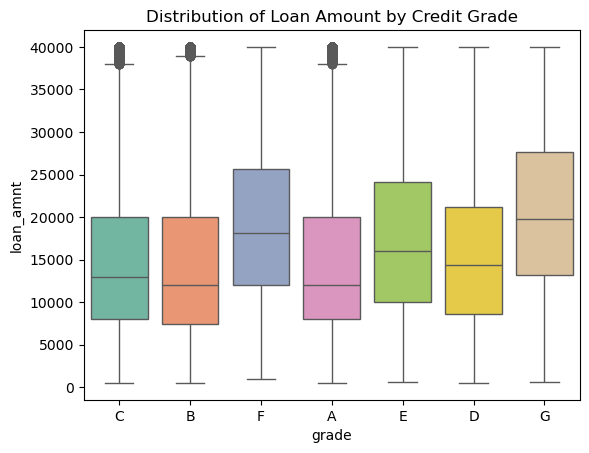

In [ ]:
# Your code here . . .
sns.boxplot(data=df, x="grade", y="loan_amnt", palette="Set2")
plt.title("Distribution of Loan Amount by Credit Grade")
plt.show()


### Q3: Come up with a another unique question. This question must use map() or apply()

Do longer-term loans (60 months) have higher average interest rates compared to shorter-term loans (36 months)?  

/var/folders/j6/p7vw9cv95dl2js7bnrm6mg100000gn/T/ipykernel_30235/772196939.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="term_months", y="int_rate", estimator="mean", palette="coolwarm")


Text(0, 0.5, 'Average Interest Rate (%)')

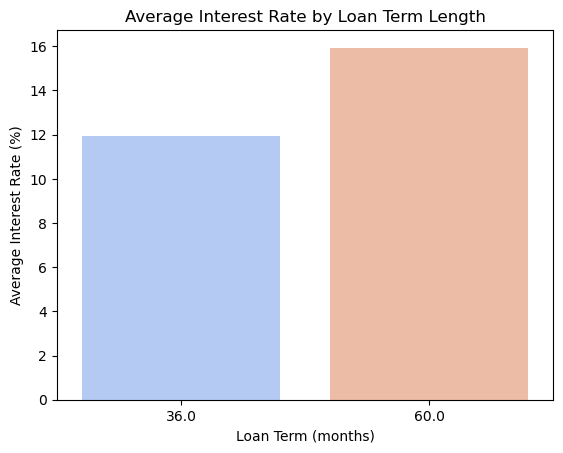

In [ ]:
# Your code here . . .
# Create a new column using map()
df["term_months"] = df["term"].map({" 36 months": 36, " 60 months": 60})

# Plot comparison
sns.barplot(data=df, x="term_months", y="int_rate", estimator="mean", palette="coolwarm")
plt.title("Average Interest Rate by Loan Term Length")
plt.xlabel("Loan Term (months)")
plt.ylabel("Average Interest Rate (%)")


### Q4: Create an interactive plot
Create an interactive plot using plotly. Your plot can be a previously asked question or a new question, however explain how this interaction strengthen what you want to communicate with your audience.

In [ ]:
!pip install plotly


In [ ]:
# Your code here . . .
import plotly.io as pio
pio.renderers.default = "browser"

import plotly.express as px

# Create sample data
data = {'loan_amnt': [5000, 10000, 15000, 20000, 25000, 12000, 8000, 30000, 4000, 22000],
'int_rate': ['10.5%', '13.2%', '9.7%', '15.1%', '17.3%', '11.8%', '12.0%', '14.5%', '8.9%', '16.4%'],
'grade': ['A', 'B', 'A', 'C', 'D', 'B', 'C', 'D', 'A', 'E'],
'term': ['36 months', '60 months', '36 months', '60 months', '60 months',
'36 months', '36 months', '60 months', '36 months', '60 months'],
'purpose': ['debt_consolidation', 'credit_card', 'home_improvement', 'car', 'medical',
'vacation', 'credit_card', 'car', 'debt_consolidation', 'credit_card']
}
df = pd.DataFrame(data)

# Clean interest rate
df['int_rate_num'] = df['int_rate'].str.replace('%', '').astype(float)

# Interactive scatter
fig = px.scatter(
df,
x='loan_amnt',
y='int_rate_num',
color='grade',
hover_data=['term', 'purpose'],
title='Interactive Plot: Loan Amount vs Interest Rate by Grade'
)

fig.show()

## Q5: Additional datasets and data processing
For the questions below you do not need to do the plotting if you have not found another complementary dataset. However, write the psuedocode of how you could go about answering the questions and sketches of what your visualization might be. Answer the following:

What additional datasets would you need to find or create to help strengthen your data?
How would you combine the dataset?
Do you need to reshape your data and how could you go about it?

**Answer:**

The lending club dataset provides a good amount of detailed loan-level data. This includes borrower info, loan amounts, interest rates, and etc. However, it seems to lack broader economic or demographic context and material.

We are still looking for complementary datasets, however some that stood out was consumer credit trends, and census income and demographics datasets.

The pseudo code is below

In [ ]:
# Your code here . . .
lc = pd.read_csv(data_path)

census = pd.read_csv("census_income.csv")

lc['issue_d'] = pd.to_datetime(lc['issue_d'])
lc['year'] = lc['issue_d'].dt.year

merged = lc.merge(census, how='left', left_on='addr_state', right_on='state')

#result: each record would now include the demographic context for the borrower, which can lead to better and more in depth analysis